In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'x')

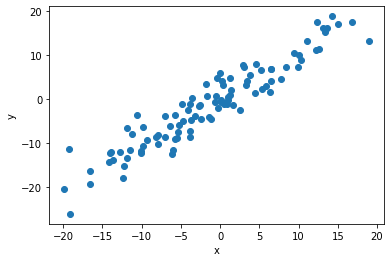

In [2]:
X = torch.randn(100, 1)*10
y = X + 3*torch.randn(100, 1)
plt.plot(X.numpy(), y.numpy(), 'o')
plt.ylabel('y')
plt.xlabel('x')

In [3]:
class LR(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size)
    def forward(self, x):
        pred = self.linear(x)
        return pred

In [4]:
torch.manual_seed(1)
model = LR(1, 1)
print(model)

LR(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)


In [5]:
[w, b] = model.parameters()
def get_params():
    return (w[0][0].item(), b[0].item())

In [6]:
def plot_fit(title):
    plt.title = title
    w1, b1 = get_params()
    x1 = np.array([-30, 30])
    y1 = w1*x1 + b1
    plt.plot(x1, y1, 'r')
    plt.scatter(X, y)
    plt.show()


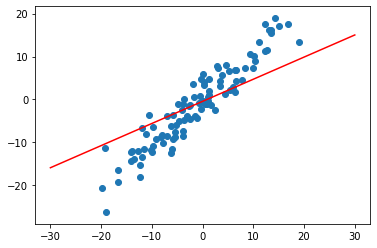

In [7]:
plot_fit('Initial Model')

In [8]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [9]:
epochs = 200
losses = []
for i in range(epochs):
    y_pred = model.forward(X)
    loss = criterion(y_pred, y)
    print("epoch:", i, "loss:", loss.item())
  
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

epoch: 0 loss: 28.62845802307129
epoch: 1 loss: 15.845559120178223
epoch: 2 loss: 11.597323417663574
epoch: 3 loss: 10.18156909942627
epoch: 4 loss: 9.70601749420166
epoch: 5 loss: 9.542695045471191
epoch: 6 loss: 9.483200073242188
epoch: 7 loss: 9.458365440368652
epoch: 8 loss: 9.445230484008789
epoch: 9 loss: 9.436165809631348
epoch: 10 loss: 9.428635597229004
epoch: 11 loss: 9.42178726196289
epoch: 12 loss: 9.415335655212402
epoch: 13 loss: 9.409175872802734
epoch: 14 loss: 9.403268814086914
epoch: 15 loss: 9.397594451904297
epoch: 16 loss: 9.392142295837402
epoch: 17 loss: 9.386899948120117
epoch: 18 loss: 9.381861686706543
epoch: 19 loss: 9.377017974853516
epoch: 20 loss: 9.372361183166504
epoch: 21 loss: 9.367884635925293
epoch: 22 loss: 9.363580703735352
epoch: 23 loss: 9.359444618225098
epoch: 24 loss: 9.355466842651367
epoch: 25 loss: 9.351643562316895
epoch: 26 loss: 9.347969055175781
epoch: 27 loss: 9.34443473815918
epoch: 28 loss: 9.341038703918457
epoch: 29 loss: 9.3377723

Text(0.5, 0, 'Epochs')

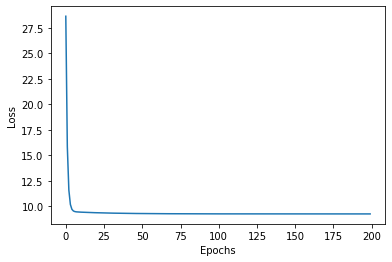

In [10]:
plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('Epochs')

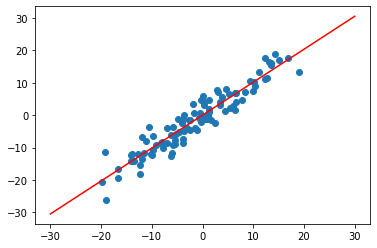

In [11]:
plot_fit("Trained Model")